# Notes

This tutorial demonstrates how to analyze feature changes along the trajectory inferred by ONTraC.
Features may include cell type composition, gene expression, regulon activity, or any other cell-level or niche-level scores.

# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [2]:
from optparse import Values

In [3]:
from ONTraC.analysis.data import AnaData
from ONTraC.utils import write_version_info

write_version_info()

##################################################################################

         ▄▄█▀▀██   ▀█▄   ▀█▀ █▀▀██▀▀█                   ▄▄█▀▀▀▄█
        ▄█▀    ██   █▀█   █     ██    ▄▄▄ ▄▄   ▄▄▄▄   ▄█▀     ▀
        ██      ██  █ ▀█▄ █     ██     ██▀ ▀▀ ▀▀ ▄██  ██
        ▀█▄     ██  █   ███     ██     ██     ▄█▀ ██  ▀█▄      ▄
         ▀▀█▄▄▄█▀  ▄█▄   ▀█    ▄██▄   ▄██▄    ▀█▄▄▀█▀  ▀▀█▄▄▄▄▀

                        version: 1.2.0

##################################################################################


In [4]:
from ONTraC.analysis.trajectory import (construct_meta_cell_along_trajectory,
                                        plot_scatter_feat_along_trajectory,
                                        plot_cell_type_composition_along_trajectory_from_anadata,
                                        plot_cell_type_composition_along_trajectory)

# Load Data

## download dataset

In [5]:
import requests

# URL of the file
url = "https://zenodo.org/records/15571644/files/Stereo_seq_data.zip"

# Local file path to save the file
file_path = "./Stereo_seq_data.zip"

try:
    # Send a GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Write the content to the file
    with open(file_path, "wb") as file:
        file.write(response.content)

    print(f"File downloaded and saved to {file_path}")
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


File downloaded and saved to ./Stereo_seq_data.zip


In [6]:
import zipfile

# Path to the zip file
zip_file_path = "Stereo_seq_data.zip"

# Directory where files will be extracted
extract_to_path = "./"

try:
    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all files to the specified directory
        zip_ref.extractall(extract_to_path)

    print(f"Files extracted to '{extract_to_path}'")
except zipfile.BadZipFile:
    print("The file is not a valid zip file.")


Files extracted to './'


## ONTraC output

In [7]:
vis_options = Values()
vis_options.NN_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NN/'
vis_options.GNN_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_GNN/'
vis_options.NT_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NT/'
vis_options.reverse = True
vis_options.output = None

In [8]:
ana_data = AnaData(vis_options)

In [9]:
ana_data.meta_data_df.head()

,Sample,Cell_Type,x,y
Cell_ID,,,,
E12_E1S3_100034,E12_E1S3,Fibro,15940.0,18584.0
E12_E1S3_100035,E12_E1S3,Fibro,15942.0,18623.0
E12_E1S3_100191,E12_E1S3,Endo,15965.0,18619.0
E12_E1S3_100256,E12_E1S3,Fibro,15969.0,18717.0
E12_E1S3_100264,E12_E1S3,Fibro,15974.0,18692.0


## regulon activities

In [10]:
regulon_aucell_df = pd.read_csv('./Stereo_seq_data/source/stereo_seq.auc.csv.gz', index_col=0)
regulon_aucell_df.iloc[:5,:5]

,Ahr,Alx1,Alx3,Alx4,Ar
Cell,,,,,
E12_E1S3_100034,0.0,0.014262,0.009032,0.038966,0.0
E12_E1S3_100035,0.0,0.017741,0.017087,0.000000,0.0
E12_E1S3_100191,0.0,0.009400,0.009933,0.026062,0.0
E12_E1S3_100256,0.0,0.017928,0.017399,0.000000,0.0
E12_E1S3_100264,0.0,0.019671,0.019565,0.042947,0.0


## differentiation potency

In [11]:
ot_res1 = pd.read_csv('./Stereo_seq_data/source/moscot/E14_E16_1_cm.csv.gz', index_col=0)
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E14_E1S3_loc.csv.gz',index_col = 0)
ot_res1.index = temp.index
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E16_E1S3_loc.csv.gz',index_col = 0)
ot_res1.columns = temp.index
ot_res1.iloc[:5,:5]

,E16_E1S3_21,E16_E1S3_22,E16_E1S3_23,E16_E1S3_26,E16_E1S3_27
E14_E1S3_170808,0.0,0.0,0.0,0.0,0.0
E14_E1S3_170916,0.0,0.0,0.0,0.0,0.0
E14_E1S3_170934,0.0,0.0,0.0,0.0,0.0
E14_E1S3_171016,0.0,0.0,0.0,0.0,0.0
E14_E1S3_171024,0.0,0.0,0.0,0.0,0.0


In [12]:
ot_res2 = pd.read_csv('./Stereo_seq_data/source/moscot/E14_E16_2_cm.csv.gz', index_col=0)
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E14_E1S3_loc.csv.gz',index_col = 0)
ot_res2.index = temp.index
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E16_E2S6_loc.csv.gz',index_col = 0)
ot_res2.columns = temp.index
ot_res2.iloc[:5,:5]

,E16_E2S6_119,E16_E2S6_147,E16_E2S6_164,E16_E2S6_193,E16_E2S6_199
E14_E1S3_170808,0.0,0.0,0.0,0.0,0.0
E14_E1S3_170916,0.0,0.0,0.0,0.0,0.0
E14_E1S3_170934,0.0,0.0,0.0,0.0,0.0
E14_E1S3_171016,0.0,0.0,0.0,0.0,0.0
E14_E1S3_171024,0.0,0.0,0.0,0.0,0.0


In [13]:
ot_res3 = pd.read_csv('./Stereo_seq_data/source/moscot/E14_E16_3_cm.csv.gz', index_col=0)
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E14_E1S3_loc.csv.gz',index_col = 0)
ot_res3.index = temp.index
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E16_E2S7_loc.csv.gz',index_col = 0)
ot_res3.columns = temp.index
ot_res3.iloc[:5,:5]

,E16_E2S7_291152,E16_E2S7_291165,E16_E2S7_291300,E16_E2S7_291398,E16_E2S7_291435
E14_E1S3_170808,0.0,1.598103e-18,0.0,0.0,7.107961e-09
E14_E1S3_170916,0.0,0.000000e+00,0.0,0.0,0.000000e+00
E14_E1S3_170934,0.0,0.000000e+00,0.0,0.0,0.000000e+00
E14_E1S3_171016,0.0,0.000000e+00,0.0,0.0,0.000000e+00
E14_E1S3_171024,0.0,0.000000e+00,0.0,0.0,0.000000e+00


## gene expression

In [14]:
E14_RGC_scaled_exp = pd.read_csv('./Stereo_seq_data/source/stereo_seq_E14_RGC_scaled_exp.csv.gz', index_col=0)
E14_RGC_scaled_exp.iloc[:5,:5]

,0610005C13Rik,0610006L08Rik,0610009B22Rik,0610009O20Rik,0610010F05Rik
Cell_ID,,,,,
E14_E1S3_171289,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179
E14_E1S3_171863,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179
E14_E1S3_171967,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179
E14_E1S3_171983,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179
E14_E1S3_172013,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179


# cell type composition along trajcetory

## cell type composition change for all cells

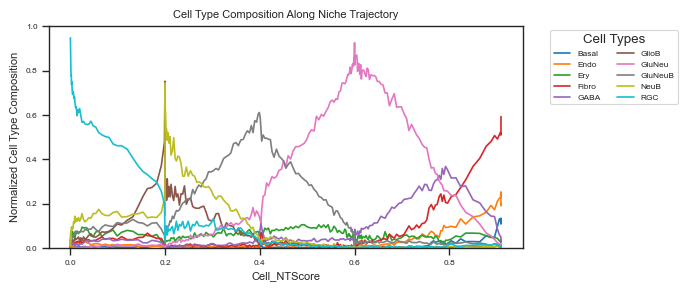

In [15]:
fig, ax = plot_cell_type_composition_along_trajectory_from_anadata(
    ana_data=ana_data,  # AnaData object
    cell_types=None,  # Column name(s) in AnaData.meta_data_df that contains the cell type information.
                      # Default is None, which means all cell types in AnaData.cell_type_codes will be used.
    agg_cell_num=100,  # Number of cells to aggregate in each bin along the trajectory. Default is 10. 1 means no aggregation.
    figsize=(7,3),  # Figure size. Default is (6, 2).
    palette=None,  # Color palette for cell types. If None, use default color palette. Keys are cell types and values are colors.
    output_file_path=None  # Path to save the figure. If None, the default path
                           # {ana_data.options.output}/lineplot_raw_cell_type_composition_along_trajectory.pdf is used. 
                           # If ana_data.options.output is also None, the figure will not be saved and the function 
                           # will return the figure and axes objects instead.
)

## cell type composition change for RGC only

In [16]:
# create data_df
data_df = ana_data.meta_data_df.copy()
data_df = data_df.join(1 - ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])
data_df = data_df.join(ana_data.cell_type_composition)

In [17]:
# filtering with cell type
data_df = data_df[data_df['Cell_Type'] == 'RGC']

In [18]:
cell_types = ana_data.cell_type_codes['Cell_Type'].values.tolist()

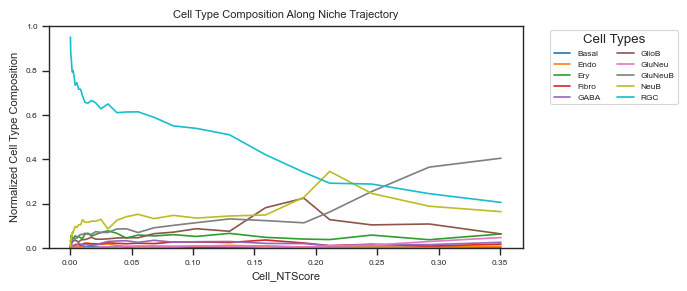

In [19]:
fig ,ax = plot_cell_type_composition_along_trajectory(
    data_df=data_df,
    trajectory='Cell_NTScore',
    cell_types=cell_types, # type: ignore
    agg_cell_num=100,
    figsize=(7,3),
    palette=None,
    output_file_path=None,
)

# gene expression along trajectory

In [20]:
target_cells = ana_data.meta_data_df[(ana_data.meta_data_df['Cell_Type'] == 'RGC') & (ana_data.meta_data_df['Sample'] == 'E14_E1S3')]
E14_RGC_gene_exp_df = E14_RGC_scaled_exp.join(1 - ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])

In [21]:
E14_RGC_gene_exp_metacell_data_df = construct_meta_cell_along_trajectory(meta_data_df = E14_RGC_gene_exp_df,
                                                                trajectory = 'Cell_NTScore',
                                                                n_cells = 10)
E14_RGC_gene_exp_metacell_data_df.iloc[:5,:5]


,0610005C13Rik,0610006L08Rik,0610009B22Rik,0610009O20Rik,0610010F05Rik
Cell_ID,,,,,
E14_E1S3_173789,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179
E14_E1S3_173259,-0.036511,-0.008535,-0.198124,-0.106792,0.117162
E14_E1S3_174106,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179
E14_E1S3_173417,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179
E14_E1S3_173284,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179


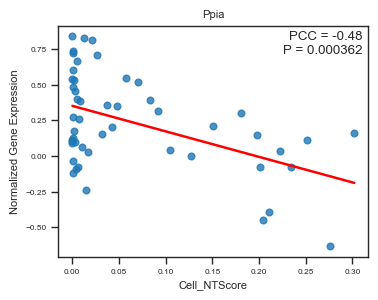

In [22]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Ppia',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
)

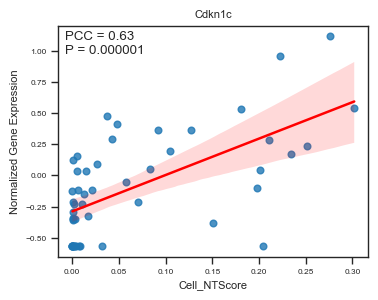

In [23]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Cdkn1c',
    fit_reg = True,
    annotate_pos = 'upper left',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    ci=95,  # Size of the confidence interval for the regression estimate
)

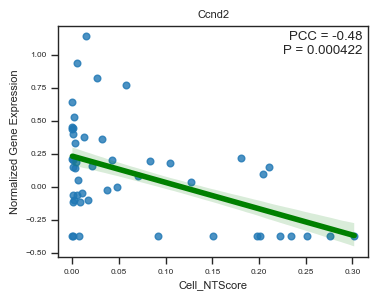

In [24]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Ccnd2',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    line_kws = {'color': 'green', 'lw': 4},  # line parameters
    ci=70,  # Size of the confidence interval for the regression estimate
)

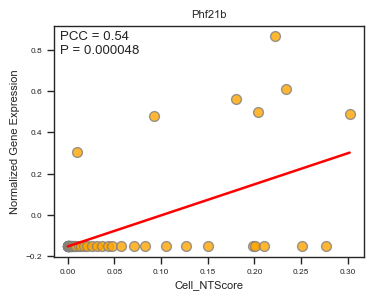

In [25]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Phf21b',
    fit_reg = True,
    annotate_pos = 'upper left',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    scatter_kws = {'color': 'orange', 'edgecolor': 'gray', 's': 50},  # scatter parameters
)

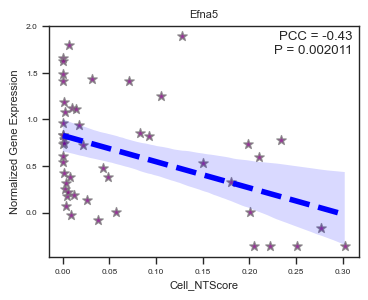

In [26]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Efna5',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    scatter_kws = {'color': 'purple', 'edgecolor': 'gray', 's': 50},  # scatter parameters
    line_kws = {'color': 'blue', 'lw': 4, 'ls': '--'},  # line parameters
    ci = 95,  # Size of the confidence interval for the regression estimate
    marker = '*',  # Marker to use for the scatterplot glyphs.
)

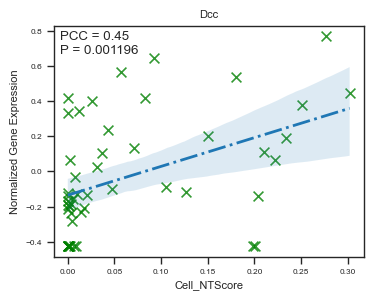

In [27]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Dcc',
    fit_reg = True,
    annotate_pos = 'upper left',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    scatter_kws = {'color': 'green', 's': 50},  # scatter parameters
    line_kws = {'color': 'C0', 'lw': 2, 'ls': '-.'},  # line parameters
    ci = 95,  # Size of the confidence interval for the regression estimate.
    marker = 'x',  # Marker to use for the scatterplot glyphs.
)

# regulon activity along trajectory

In [28]:
E14_RGC_regulon_aucell_df = regulon_aucell_df.loc[target_cells.index]
E14_RGC_regulon_aucell_df = E14_RGC_regulon_aucell_df.join(1-ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])
E14_RGC_regulon_aucell_df.iloc[:5,:5]


,Ahr,Alx1,Alx3,Alx4,Ar
Cell_ID,,,,,
E14_E1S3_171289,0.0,0.015500,0.014530,0.000000,0.0
E14_E1S3_171863,0.0,0.018301,0.017757,0.032068,0.0
E14_E1S3_171967,0.0,0.011018,0.009434,0.000000,0.0
E14_E1S3_171983,0.0,0.020709,0.000000,0.003596,0.0
E14_E1S3_172013,0.0,0.009773,0.008186,0.000000,0.0


In [29]:
E14_RGC_regulon_aucell_metacell_data_df = construct_meta_cell_along_trajectory(meta_data_df = E14_RGC_regulon_aucell_df,
                                                                trajectory = 'Cell_NTScore',
                                                                n_cells = 10)
E14_RGC_regulon_aucell_metacell_data_df.iloc[:5,:5]


,Ahr,Alx1,Alx3,Alx4,Ar
Cell_ID,,,,,
E14_E1S3_173789,0.0,0.012552,0.019366,0.011585,0.000000
E14_E1S3_173259,0.0,0.019238,0.021671,0.014015,0.000000
E14_E1S3_174106,0.0,0.010374,0.022217,0.004985,0.014738
E14_E1S3_173417,0.0,0.024025,0.014273,0.005424,0.000000
E14_E1S3_173284,0.0,0.016657,0.011069,0.011577,0.014097


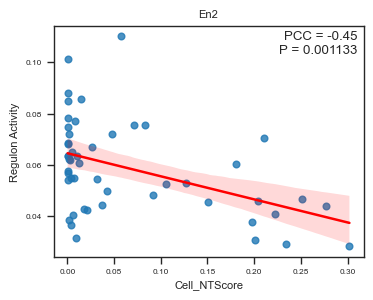

In [30]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_regulon_aucell_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'En2',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Regulon Activity',
    ci = 95,
)

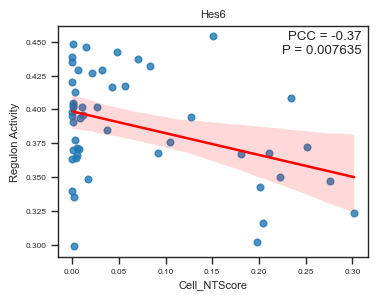

In [31]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_regulon_aucell_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Hes6',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Regulon Activity',
    ci = 95,
)

# differentiation potency along trajectory

## load moscot results

In [32]:
def ot_res_process(ot_res):
    ot_res = ot_res.loc[ot_res.index.isin(ana_data.meta_data_df.index),
                       ot_res.columns.isin(ana_data.meta_data_df.index)]
    top_5_indices = ot_res.apply(lambda row: row.nlargest(5).index, axis=1)
    top_5_cell_types = top_5_indices.apply(lambda x: ana_data.meta_data_df.loc[x, 'Cell_Type'])
    summary_df = top_5_cell_types.apply(lambda x: x.value_counts(), axis=1).fillna(0).astype(int)
    summary_df = summary_df.loc[target_cells.index]
    summary_df = summary_df.div(summary_df.sum(axis=1).values, axis=0)
    summary_df = summary_df.join(1-ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])
    
    return summary_df
    

In [33]:
summary_df_1 = ot_res_process(ot_res1)
summary_df_1.iloc[:5,:5]


,Basal,Endo,Ery,Fibro,GABA
Cell_ID,,,,,
E14_E1S3_171289,0.0,0.0,0.0,0.2,0.4
E14_E1S3_171863,0.0,0.0,0.0,0.0,0.0
E14_E1S3_171967,0.0,0.0,0.0,0.0,0.0
E14_E1S3_171983,0.0,0.0,0.0,0.0,0.2
E14_E1S3_172013,0.0,0.0,0.0,0.0,0.2


In [34]:
E14_RGC_metacell_diff_p_1_df = construct_meta_cell_along_trajectory(
    meta_data_df = summary_df_1,
    trajectory = 'Cell_NTScore',
    n_cells = 10)
E14_RGC_metacell_diff_p_1_df.iloc[:5,:5]

,Basal,Endo,Ery,Fibro,GABA
Cell_ID,,,,,
E14_E1S3_173789,0.0,0.0,0.00,0.00,0.02
E14_E1S3_173259,0.0,0.0,0.00,0.02,0.00
E14_E1S3_174106,0.0,0.0,0.02,0.00,0.00
E14_E1S3_173417,0.0,0.0,0.00,0.02,0.08
E14_E1S3_173284,0.0,0.0,0.06,0.00,0.08


In [35]:
summary_df_2 = ot_res_process(ot_res2)
E14_RGC_metacell_diff_p_2_df = construct_meta_cell_along_trajectory(
    meta_data_df = summary_df_2,
    trajectory = 'Cell_NTScore',
    n_cells = 10)
E14_RGC_metacell_diff_p_2_df.iloc[:5,:5]


,Basal,Endo,Ery,Fibro,GABA
Cell_ID,,,,,
E14_E1S3_173789,0.0,0.0,0.02,0.06,0.12
E14_E1S3_173259,0.0,0.0,0.00,0.00,0.08
E14_E1S3_174106,0.0,0.0,0.02,0.04,0.04
E14_E1S3_173417,0.0,0.0,0.02,0.00,0.04
E14_E1S3_173284,0.0,0.0,0.00,0.02,0.10


In [36]:
summary_df_3 = ot_res_process(ot_res3)
E14_RGC_metacell_diff_p_3_df = construct_meta_cell_along_trajectory(
    meta_data_df = summary_df_3,
    trajectory = 'Cell_NTScore',
    n_cells = 10)
E14_RGC_metacell_diff_p_3_df.iloc[:5,:5]


,Basal,Endo,Ery,Fibro,GABA
Cell_ID,,,,,
E14_E1S3_173789,0.00,0.0,0.00,0.12,0.02
E14_E1S3_173259,0.02,0.0,0.02,0.04,0.02
E14_E1S3_174106,0.00,0.0,0.12,0.06,0.08
E14_E1S3_173417,0.02,0.0,0.04,0.06,0.04
E14_E1S3_173284,0.00,0.0,0.02,0.06,0.12


## merge all three replicates

In [37]:
E14_RGC_metacell_diff_p_1_melted_df = E14_RGC_metacell_diff_p_1_df.melt(
    id_vars='Cell_NTScore',
    value_vars=E14_RGC_metacell_diff_p_1_df.columns.tolist()[:-1],
    var_name='Cell type',
    value_name='Percentage')
E14_RGC_metacell_diff_p_1_melted_df['replicate'] = ['rep1'] * E14_RGC_metacell_diff_p_1_melted_df.shape[0]
E14_RGC_metacell_diff_p_1_melted_df.iloc[:5,:5]


,Cell_NTScore,Cell type,Percentage,replicate
0,0.000230,Basal,0.0,rep1
1,0.000240,Basal,0.0,rep1
2,0.000250,Basal,0.0,rep1
3,0.000266,Basal,0.0,rep1
4,0.000285,Basal,0.0,rep1


In [38]:
E14_RGC_metacell_diff_p_2_melted_df = E14_RGC_metacell_diff_p_2_df.melt(
    id_vars='Cell_NTScore',
    value_vars=E14_RGC_metacell_diff_p_2_df.columns.tolist()[:-1],
    var_name='Cell type',
    value_name='Percentage')
E14_RGC_metacell_diff_p_2_melted_df['replicate'] = ['rep2'] * E14_RGC_metacell_diff_p_2_melted_df.shape[0]
E14_RGC_metacell_diff_p_2_melted_df.iloc[:5,:5]


,Cell_NTScore,Cell type,Percentage,replicate
0,0.000230,Basal,0.0,rep2
1,0.000240,Basal,0.0,rep2
2,0.000250,Basal,0.0,rep2
3,0.000266,Basal,0.0,rep2
4,0.000285,Basal,0.0,rep2


In [39]:
E14_RGC_metacell_diff_p_3_melted_df = E14_RGC_metacell_diff_p_3_df.melt(
    id_vars='Cell_NTScore',
    value_vars=E14_RGC_metacell_diff_p_3_df.columns.tolist()[:-1],
    var_name='Cell type',
    value_name='Percentage')
E14_RGC_metacell_diff_p_3_melted_df['replicate'] = ['rep3'] * E14_RGC_metacell_diff_p_3_melted_df.shape[0]
E14_RGC_metacell_diff_p_3_melted_df.iloc[:5,:5]


,Cell_NTScore,Cell type,Percentage,replicate
0,0.000230,Basal,0.00,rep3
1,0.000240,Basal,0.02,rep3
2,0.000250,Basal,0.00,rep3
3,0.000266,Basal,0.02,rep3
4,0.000285,Basal,0.00,rep3


In [40]:
E14_RGC_metacell_diff_p_melted = pd.concat([E14_RGC_metacell_diff_p_1_melted_df,
                                            E14_RGC_metacell_diff_p_2_melted_df,
                                            E14_RGC_metacell_diff_p_3_melted_df])
E14_RGC_metacell_diff_p_melted.head()

,Cell_NTScore,Cell type,Percentage,replicate
0,0.000230,Basal,0.0,rep1
1,0.000240,Basal,0.0,rep1
2,0.000250,Basal,0.0,rep1
3,0.000266,Basal,0.0,rep1
4,0.000285,Basal,0.0,rep1


## visualization

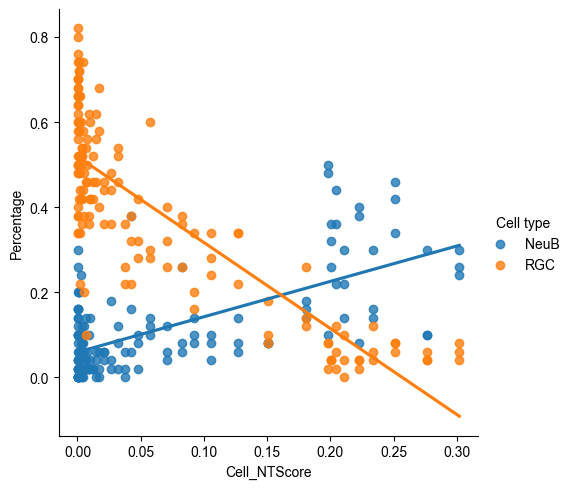

In [41]:
sns.lmplot(data = E14_RGC_metacell_diff_p_melted[E14_RGC_metacell_diff_p_melted['Cell type'].isin(['RGC', 'NeuB'])],
           x = 'Cell_NTScore',
           y = 'Percentage',
           hue = 'Cell type',
           scatter_kws={'edgecolor': None},
           ci=None,
          )

# Session Info

In [42]:
import session_info

session_info.show()